### <img src='fig/vertical_COMILLAS_COLOR.jpg' style= 'width:70mm'>

<h1 style='font-family: Optima;color:#ecac00'>
Máster en Big Data. Tecnología y Analítica Avanzada (MBD).
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Introducción al Análisis Estadístico con Lenguajes de Programación para Machine Learning (IAELPML). 2023-2024.
</h1>


<h1 style='font-family: Optima;color:#ecac00'>
Assignment
<a class="tocSkip">    
</h1>  
   

<h1 style='font-family: Optima;color:red'>
Due Date: 2023-11-28
<a class="tocSkip">    
</h1>  


# FINAL COURSE PROJECT

# MADE BY: 

# Manuel Oliveira Pineiro, 202305593@alu.comillas.edu
# Alberto García Martín, 
# Jorge Peralta, 
# Juan López Segura, 202308780@alu.comillas.edu

# CODE

## First Steps

Before starting, we must import the necessary libraries.

In [2]:
# para nosotros: Solo pongo las que he tenido que usar. Segun necesitemos mas las metemos, pero asi no tenemos 10 de las cuales usamos 4

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats



First of all, we load the dataset into a pandas DataFrame named Housing.csv downloaded from *https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction?resource=download*. After that, we take a look at the first 10 rows, shape of the DataFrame and type of columns in order to understand the variables.

In [3]:
houses = pd.read_csv('Data/Housing.csv', sep=",", header=0)

houses.head(n = 10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [4]:
print("Shape of the DataFrame = \n", houses.shape)

Shape of the DataFrame = 
 (545, 13)


In [5]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


As we can see, the data file is moderately easy to understand, as well as the information that the columns contain. There are 13 different variables, 545 observations, and no missing values. Nonetheless, we are going to check it.

## Missing Data

The code to eliminate the missing data is really simple, using the code below:

In [6]:
houses = houses.dropna()
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Obviously, there are some examples where we would like to assign values, instead of removing the observations, but for our example none of these is necessary.

## Factor Conversion

The next step is to identify the variables that should be factor due to its values, range, etc. There are some of them (the binaries and the string ones) whose type is designated as object, crearly factors, but maybe some of the *int64* ones go unnoticed.

In [8]:
houses.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


As we can see, the variables `bedrooms`, `bathrooms`, `stories` and `parking` should be treated as a factor, so we proceed in the cell below.

In [41]:
houses = houses.astype({'bedrooms':'category', 'bathrooms':'category', 'stories':'category', 'parking':'category', 
                        'mainroad':'category', 'guestroom':'category', 'basement':'category', 'hotwaterheating':'category', 
                        'airconditioning':'category', 'prefarea':'category', 'furnishingstatus':'category'})

Another option:

In [42]:
# factorCols = houses.select_dtypes(include='object').columns
# factorCols
#houses.loc[:, factorCols] = houses.loc[:, factorCols].astype('category')

In [43]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    category
 3   bathrooms         545 non-null    category
 4   stories           545 non-null    category
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    category
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(11), int64(2)
memory usage: 16.2 KB


Now that we have our data set prepared, we start with the study of each column.

## Detailed Exploratory Analysis

### Variable `price`

As a first approach, we can calculate some statistical measures for our variables.

In [46]:
houses['price'].describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

In [47]:
print('The mean of the price variable is: ', houses['price'].mean())
print('\n','-'*70,'\n')
print('The first quartile of the price variable is: ', houses['price'].quantile(0.25))
print('\n','-'*70,'\n')
print('The third quartile of the price variable is: ', houses['price'].quantile(0.75))
print('\n','-'*70,'\n')
print('The median of the price variable is: ', houses['price'].median())
print('\n','-'*70,'\n')
print('The minimum value of the price variable is: ', houses['price'].min())
print('\n','-'*70,'\n')
print('The maximum value of the price variable is: ', houses['price'].max())
print('\n','-'*70,'\n')
print('The standard deviation of the price variable is: ', houses['price'].std(),'\n')

The mean of the price variable is:  4766729.247706422

 ---------------------------------------------------------------------- 

The first quartile of the price variable is:  3430000.0

 ---------------------------------------------------------------------- 

The third quartile of the price variable is:  5740000.0

 ---------------------------------------------------------------------- 

The median of the price variable is:  4340000.0

 ---------------------------------------------------------------------- 

The minimum value of the price variable is:  1750000

 ---------------------------------------------------------------------- 

The maximum value of the price variable is:  13300000

 ---------------------------------------------------------------------- 

The standard deviation of the price variable is:  1870439.6156573922 



Now, we can observe a table with absolute frequencies of our variables.

In [48]:
houses['price'].value_counts().sort_index()

price
1750000     3
1767150     1
1820000     1
1855000     1
1890000     2
           ..
10850000    1
11410000    1
12215000    1
12250000    2
13300000    1
Name: count, Length: 219, dtype: int64

Our table suggest that we should handle our variable as a continuous one to obtain good graphical results because most values of this variable appear only once in the table.

So, we will define four classes as follows:
- $price \leq 3500000$: cheap houses.
- $3500000 < price \leq 7000000$: medium-price houses.
- $7000000 < price \leq 10000000$: expensive houses.
- $10000000 < price $: overpriced houses.

Next step is to build our intervals (classes) and check which interval corresponds to each observation.

In [49]:
bins = [1329000, 3500000, 7000000, 10000000, 13300000]
pd.cut(houses['price'], bins = bins, ordered = True)

0      (10000000, 13300000]
1      (10000000, 13300000]
2      (10000000, 13300000]
3      (10000000, 13300000]
4      (10000000, 13300000]
               ...         
540      (1329000, 3500000]
541      (1329000, 3500000]
542      (1329000, 3500000]
543      (1329000, 3500000]
544      (1329000, 3500000]
Name: price, Length: 545, dtype: category
Categories (4, interval[int64, right]): [(1329000, 3500000] < (3500000, 7000000] < (7000000, 10000000] < (10000000, 13300000]]

We add a column to our dataframe with the interval for each record.

In [50]:
houses['price_binned'] = pd.cut(houses['price'], bins = bins, ordered = True)
houses['price_binned'].value_counts().sort_index()

price_binned
(1329000, 3500000]      158
(3500000, 7000000]      323
(7000000, 10000000]      56
(10000000, 13300000]      8
Name: count, dtype: int64

Let's check it.

In [51]:
houses.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_binned
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,"(10000000, 13300000]"
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,"(10000000, 13300000]"
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,"(10000000, 13300000]"
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,"(10000000, 13300000]"
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,"(10000000, 13300000]"


We plot now our binned variable with an histogram.

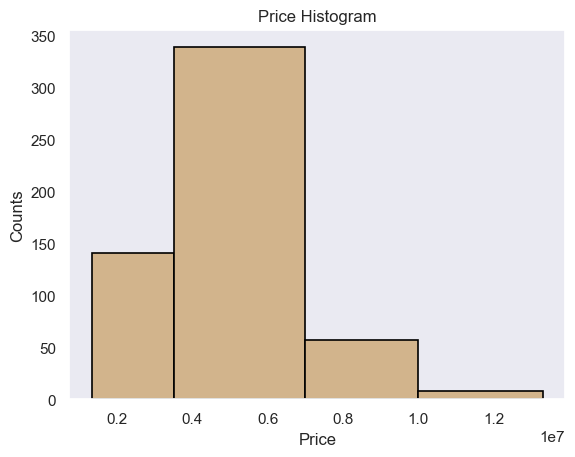

In [54]:
sns.set()
plot = houses.hist('price', edgecolor = 'black', linewidth = 1.2, 
                   grid = False, color = 'tan', bins = bins) 

plt.xlabel('Price')
plt.ylabel('Counts')
plt.title('Price Histogram')
plt.show()

As we could expect, medium-priced houses are the most common class, while overpriced houses are less often seen.

We can represent our not-binned variable with an histogram, as well as a density plot.

C:\Users\juanl\anaconda3\envs\IAELPML\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\juanl\anaconda3\envs\IAELPML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


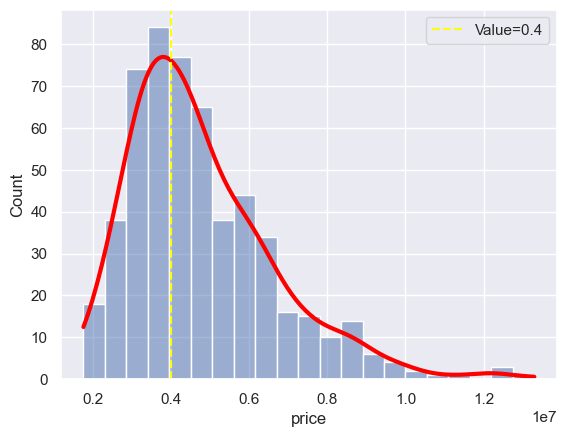

In [57]:
dens_plot = sns.histplot(data = houses, x = 'price', kde = True)
dens_plot.lines[0].set_color('red')
dens_plot.lines[0].set_linewidth(3)
plt.axvline(x = 0.4*1e7, color = 'yellow', linestyle = '--', label = f'Value={0.4}')
plt.legend()

We can see in the plot how we have a unimodal distribution that is slightly right sweked. The mode is centered at a slightly lower number than 0.4 (in terms of 1e7). Additionally, the density curve resembles slightly a Gaussian bell curve, so we will check if we can assume that its distribution is normal.

We will check it with a QQplot. If our variable is normally-distributed, the points should fall on a line.

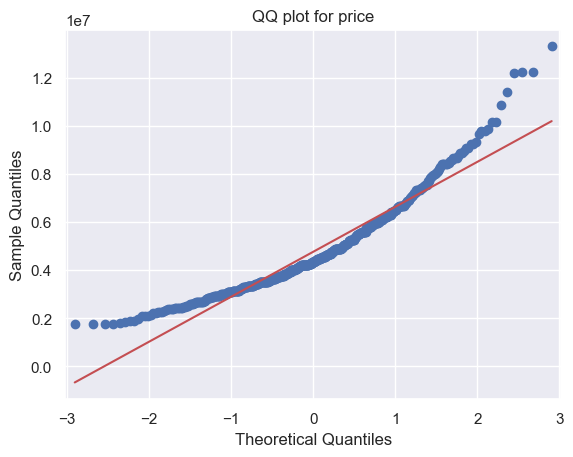

In [51]:
sm.qqplot(houses['price'], line='s')
plt.title('QQ plot for price')
plt.show()

So, we cannot assume that our variable is normally-distributed, since there are a large proportion of the points not falling in the line.

Finally, we represent our variable with a mix of two graphics: a violinplot and a boxplot.

C:\Users\juanl\anaconda3\envs\IAELPML\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\juanl\anaconda3\envs\IAELPML\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


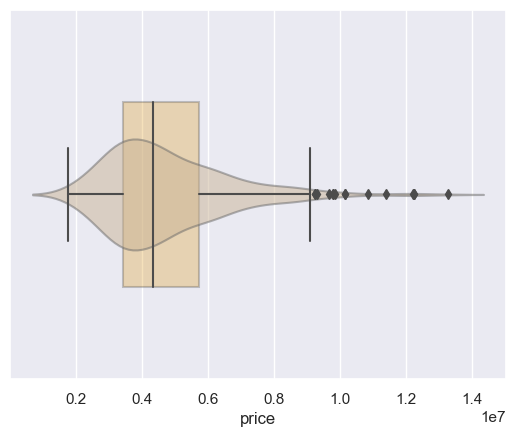

In [83]:
ax = sns.boxplot(x = 'price', data = houses, width = 0.5, color = 'orange', boxprops = dict(alpha = 0.3))
ax = sns.violinplot(x = 'price', data = houses, width = 0.3, alpha = 0.3, color = 'tan', inner = None)

for violin, alpha in zip(ax.collections[::2], [0.5]):
    violin.set_alpha(alpha)

We have some outliers at the top of the plot, but not at the bottom, so we will locate them:

In [22]:
price_iqr = stats.iqr(houses['price'])
price_q1, price_q3 = np.quantile(houses['price'], [0.25, 0.75])

cut_low = price_q1 - 1.5 * price_iqr
cut_high = price_q3 + 1.5 * price_iqr

print("Lower and upper outlier limits:", cut_low, ", ", cut_high)

price_outliers = houses.loc[(houses['price'] > cut_high)]

print("The outliers are")

price_outliers

Lower and upper outlier limits: -35000.0 ,  9205000.0
The outliers are


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_binned
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,"(10000000, 13300000]"
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,"(10000000, 13300000]"
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,"(10000000, 13300000]"
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,"(10000000, 13300000]"
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,"(10000000, 13300000]"
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished,"(10000000, 13300000]"
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished,"(10000000, 13300000]"
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished,"(10000000, 13300000]"
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished,"(7000000, 10000000]"
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished,"(7000000, 10000000]"


In [32]:
print('So, we have', price_outliers.shape[0], 'outliers:',
    price_outliers[price_outliers['price'] > 10000000].shape[0],
     'are from overpriced houses class and', 
      price_outliers[price_outliers['price'] <= 10000000].shape[0],
     'are from expensive houses class.')

So, we have 15 outliers: 8 are from overpriced houses class and 7 are from expensive houses class.


In [33]:
houses.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_binned
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,"(10000000, 13300000]"
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,"(10000000, 13300000]"
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,"(10000000, 13300000]"
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,"(10000000, 13300000]"
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,"(10000000, 13300000]"


### Variable `bedrooms`

We continue with this column, calculating some statistical measures for our variable.

In [80]:
print('The mean of the bedrooms variable is: ', houses['bedrooms'].mean())
print('\n','-'*70,'\n')
print('The first quartile of the bedrooms variable is: ', houses['bedrooms'].quantile(0.25))
print('\n','-'*70,'\n')
print('The third quartile of the bedrooms variable is: ', houses['bedrooms'].quantile(0.75))
print('\n','-'*70,'\n')
print('The median of the bedrooms variable is: ', houses['bedrooms'].median())
print('\n','-'*70,'\n')
print('The minimum value of the bedrooms variable is: ', houses['bedrooms'].min())
print('\n','-'*70,'\n')
print('The maximum value of the bedrooms variable is: ', houses['bedrooms'].max())
print('\n','-'*70,'\n')
print('The standard deviation of the bedrooms variable is: ', houses['bedrooms'].std(),'\n')


 ---------------------------------------------------------------------- 


 ---------------------------------------------------------------------- 


 ---------------------------------------------------------------------- 


 ---------------------------------------------------------------------- 



TypeError: Categorical is not ordered for operation min
you can use .as_ordered() to change the Categorical to an ordered one


We create now the tables of absolute and relative frequencies for our variable.

In [75]:
print(houses['bedrooms'].describe())
print("-" * 30, "\n")
print("Absolute Frequency: \n")
print(houses['bedrooms'].value_counts().sort_index())
print("-" * 30, "\n")
print("Relative Frequency: \n")
print(houses['bedrooms'].value_counts(normalize = True).sort_index())
print("-" * 30, "\n")

count     545
unique      6
top         3
freq      300
Name: bedrooms, dtype: int64
------------------------------ 

Absolute Frequency: 

bedrooms
1      2
2    136
3    300
4     95
5     10
6      2
Name: count, dtype: int64
------------------------------ 

Relative Frequency: 

bedrooms
1    0.003670
2    0.249541
3    0.550459
4    0.174312
5    0.018349
6    0.003670
Name: proportion, dtype: float64
------------------------------ 



Finally, we represent a barplot showing the relative frequencies, in order to represent the probabilities of the different number of bedrooms.


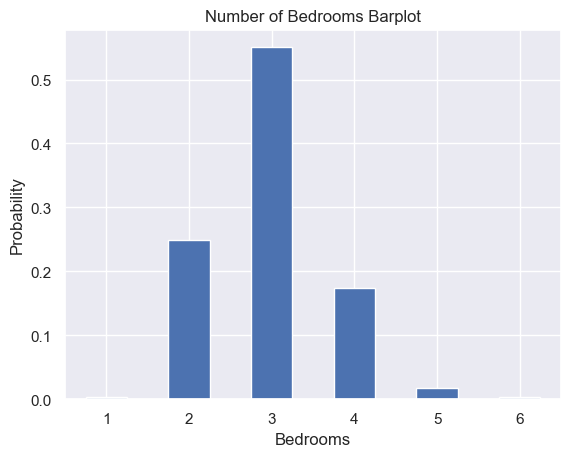

In [71]:
RelFreq_1 = houses['bedrooms'].value_counts(normalize = True).sort_index()
sns.set()
plot = RelFreq_1.plot.bar(rot=0, xlabel='Bedrooms', ylabel ='Probability')
plt.title('Number of Bedrooms Barplot')
plt.show()

We can say that the most common number of bedrooms is 3, since the less often seen number of bedrooms is 1 and 6, which makes sense. Notice that 3 is the median and almost the mean of our variable, so we could expect this result. In the other hand, 1 and 6 bedrooms are the extreme values, so it could be expected too. 

### Variable `mainroad`

It is a binary variable so it can only take two values.

First of all, we create the same previous tables of frequencies of our variable.

We build now the relative frequencies' table.

In [81]:
print(houses['mainroad'].describe())
print("-" * 30, "\n")
print("Absolute Frequency: \n")
print(houses['mainroad'].value_counts().sort_index())
print("-" * 30, "\n")
print("Relative Frequency: \n")
print(houses['mainroad'].value_counts(normalize = True).sort_index())
print("-" * 30, "\n")

count     545
unique      2
top       yes
freq      468
Name: mainroad, dtype: object
------------------------------ 

Absolute Frequency: 

mainroad
no      77
yes    468
Name: count, dtype: int64
------------------------------ 

Relative Frequency: 

mainroad
no     0.141284
yes    0.858716
Name: proportion, dtype: float64
------------------------------ 



Finally, we represent a barplot with the relative frequencies.


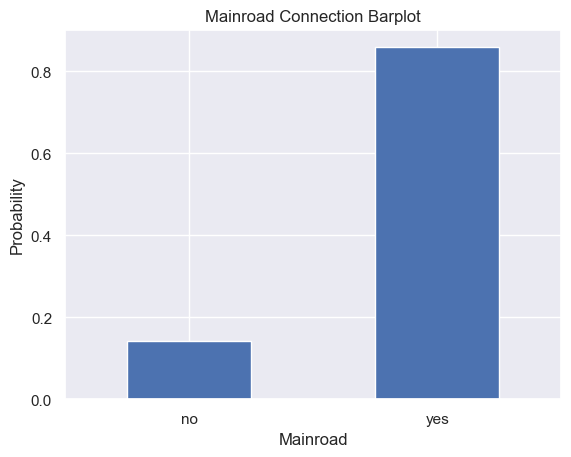

In [82]:
RelFreq_4 = houses['mainroad'].value_counts(normalize = True).sort_index()
sns.set()
plot = RelFreq_4.plot.bar(rot=0, xlabel='Mainroad', ylabel ='Probability')
plt.title('Mainroad Connection Barplot')
plt.show()

As a result of our plot, we can affirm that being connected to the mainroad is much more frequent than not being connected to the mainroad.

The next variable to study is going to be `parking`.

### Variable `parking`

As we can imagine, this column specifies the number of parking spaces available in the house.

In [76]:
print('The mean of the bedrooms variable is: ', houses['parking'].mean())
print('\n','-'*70,'\n')
print('The first quartile of the bedrooms variable is: ', houses['parking'].quantile(0.25))
print('\n','-'*70,'\n')
print('The third quartile of the bedrooms variable is: ', houses['parking'].quantile(0.75))
print('\n','-'*70,'\n')
print('The median of the bedrooms variable is: ', houses['parking'].median())
print('\n','-'*70,'\n')
print('The minimum value of the bedrooms variable is: ', houses['parking'].min())
print('\n','-'*70,'\n')
print('The maximum value of the bedrooms variable is: ', houses['parking'].max())
print('\n','-'*70,'\n')
print('The standard deviation of the bedrooms variable is: ', houses['parking'].std(),'\n')

TypeError: 'Categorical' with dtype category does not support reduction 'mean'

In [62]:
print(houses['parking'].describe())
print("-" * 30, "\n")
print("Absolute Frequency: \n")
print(houses['parking'].value_counts().sort_index())
print("-" * 30, "\n")
print("Relative Frequency: \n")
print(houses['parking'].value_counts(normalize = True).sort_index())
print("-" * 30, "\n")

count     545
unique      4
top         0
freq      299
Name: parking, dtype: int64
------------------------------ 

Absolute Frequency: 

parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64
------------------------------ 

Relative Frequency: 

parking
0    0.548624
1    0.231193
2    0.198165
3    0.022018
Name: proportion, dtype: float64
------------------------------ 



We can observe that more than 2 places is really strange, and it is probably directly related with the price of the house. 

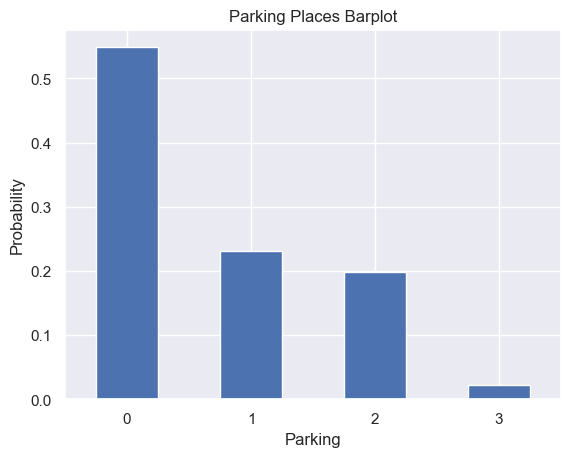

In [64]:
RelFreq_9 = houses['parking'].value_counts(normalize = True).sort_index()
sns.set()
plot = RelFreq_9.plot.bar(rot=0, xlabel='Parking', ylabel ='Probability')
plt.title('Parking Places Barplot')
plt.show()

We could bin this variable into a dicotomic one that indicates wether the house has parking places or not, but it seems that we could lost valuable information for the next sections. We repeat the process with the last two factor columns.

### Variable `prefarea`

This variable informs about the area or neighbourhood, if it is considered as preferred or not.

In [66]:
print(houses['prefarea'].describe())
print("-" * 30, "\n")
print("Absolute Frequency: \n")
print(houses['prefarea'].value_counts().sort_index())
print("-" * 30, "\n")
print("Relative Frequency: \n")
print(houses['prefarea'].value_counts(normalize = True).sort_index())
print("-" * 30, "\n")

count     545
unique      2
top        no
freq      417
Name: prefarea, dtype: object
------------------------------ 

Absolute Frequency: 

prefarea
no     417
yes    128
Name: count, dtype: int64
------------------------------ 

Relative Frequency: 

prefarea
no     0.765138
yes    0.234862
Name: proportion, dtype: float64
------------------------------ 



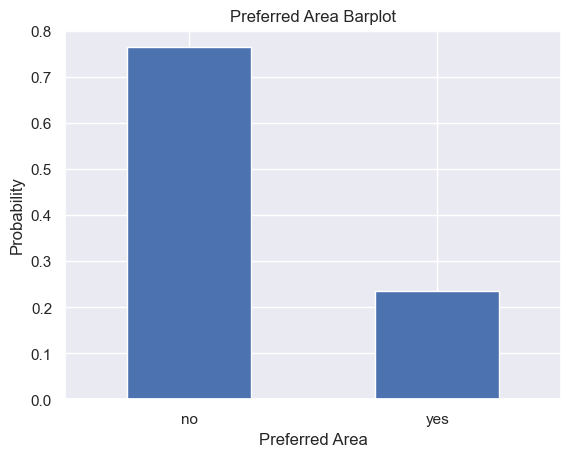

In [67]:
RelFreq_10 = houses['prefarea'].value_counts(normalize = True).sort_index()
sns.set()
plot = RelFreq_10.plot.bar(rot=0, xlabel='Preferred Area', ylabel ='Probability')
plt.title('Preferred Area Barplot')
plt.show()

The results indicate that the majority of the homes are located in disliked locations, something usual in a random houses data set, due to the percentage of each of them in a city.

The last one to study is the column `furnishingstatus`, that reveals information about the furniture availbale in the house.

### Variable `furnishingstatus`

In [69]:
print(houses['furnishingstatus'].describe())
print("-" * 30, "\n")
print("Absolute Frequency: \n")
print(houses['furnishingstatus'].value_counts().sort_index())
print("-" * 30, "\n")
print("Relative Frequency: \n")
print(houses['furnishingstatus'].value_counts(normalize = True).sort_index())
print("-" * 30, "\n")

count                545
unique                 3
top       semi-furnished
freq                 227
Name: furnishingstatus, dtype: object
------------------------------ 

Absolute Frequency: 

furnishingstatus
furnished         140
semi-furnished    227
unfurnished       178
Name: count, dtype: int64
------------------------------ 

Relative Frequency: 

furnishingstatus
furnished         0.256881
semi-furnished    0.416514
unfurnished       0.326606
Name: proportion, dtype: float64
------------------------------ 



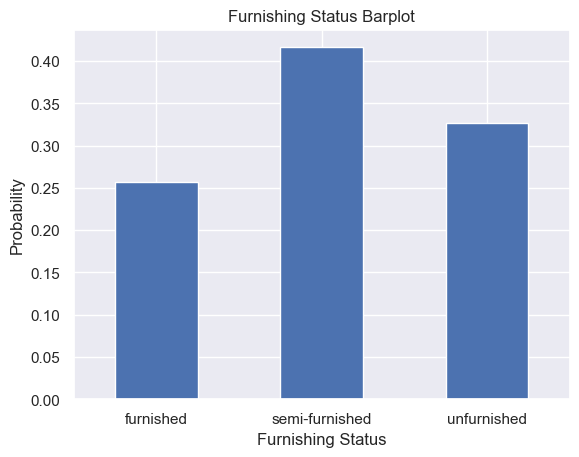

In [70]:
RelFreq_11 = houses['furnishingstatus'].value_counts(normalize = True).sort_index()
sns.set()
plot = RelFreq_11.plot.bar(rot=0, xlabel='Furnishing Status', ylabel ='Probability')
plt.title('Furnishing Status Barplot')
plt.show()

As we can see, the main option are the semi-furnished houses. Behind that, 
there is a slightly higher percentage ofunfurnished  house, followed by the furnished ones.s